# Setup

In [1]:
"""
Add parent directorys to current path
"""
import os.path
import sys
p = os.path.abspath('..')
if p not in sys.path:
    sys.path.insert(0,p)
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)
    
    
"""
Add tiger-env directory to current path
Still not sure why this is needed.
"""
p = os.path.abspath('../../../custom_envs/gym-tiger')
if p not in sys.path:
    sys.path.insert(0, p)
    

"""
Enable hot-reloading
"""    
from notebook_utils import import_module_by_name, reload_module_by_name

def reload():
    reload_module_by_name('rlpomdp.models.tiger_env', 'QLearnerSeq')
    global QLearnerSeq
    from rlpomdp.models.tiger_env import QLearnerSeq

# Setup ENV and Model

In [2]:
import gym
import gym_tiger
import matplotlib.pyplot as plt
from rlpomdp.utils import play_one, plot_running_avg
from rlpomdp.models.tiger_env import QLearnerSeq

env = gym.make('Tiger-v0')
env.__init__(reward_tiger=-100, reward_gold=10, reward_listen=-1)
model = QLearnerSeq(env, alpha=.001, gamma=.9)
eps = 1
n = 0
ot = env.reset()

if 'monitor' in sys.argv:
    filename = os.path.basename(__file__).split('.')[0]
    monitor_dir = './' + filename + '_' + str(datetime.now())
    env = wrappers.Monitor(env, monitor_dir)

ImportError: cannot import name 'ArrayToStringTransformer'

# Take one action and update Q

$$
Q(s_{t-1}, a_{t-1}) = Q(s_{t-1}, a_{t-1}) + \alpha \big[ r_t + \gamma \cdot Q(s_t, a_t) - Q(s_{t-1}, a_{t-1}) \big]
$$

In [5]:
def print_model(model, n=''):
    print('\n')
    print('{: >10} \tOPEN LEFT | OPEN RIGHT | LISTEN'.format(n))
    print('\t\t--------- | ---------- | ------')
    print("GROWL LEFT {: >14} | {: >10} | {: >6}".format(*model.Q[0].round(2)))
    print("GROWL RIGHT: {: >12} | {: >10} | {: >6}".format(*model.Q[1].round(2)))
    print("START: {: >18} | {: >10} | {: >6}".format(*model.Q[2].round(2)))
    print("END: {: >20} | {: >10} | {: >6}".format(*model.Q[3].round(2)))
    print('\n')

print_model(model)
otm1 = ot
atm1 = model.sample_action(otm1, eps)
ot, r, done, info = env.step(atm1)
at = model.best_action(ot)
model.update(otm1, atm1, r, ot, at)
_otm1 = env.translate_obs(otm1)
_atm1 = env.translate_action(atm1)
print(_otm1, ',', _atm1, ',', r)
print_model(model)



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT          -0.73 |      -0.59 |  -0.26
GROWL RIGHT:         0.92 |      -0.47 |  -0.88
START:               0.11 |       0.65 |   0.48
END:                -0.54 |      -0.18 |   0.53




AttributeError: 'builtin_function_or_method' object has no attribute 'flatten'

In [ ]:
gym.spaces.discrete.Discrete()

# Play 1 Episode

In [7]:
play_one(env, model, eps, verbose=True)

o_t-1       | a_t-1      | r     | o_t         | a_t       
-------------------------------------------------------
START       | OPEN_RIGHT | 10    | END         | LISTEN    


10

In [8]:
print_model(model)



           	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT           0.49 |       0.23 |  -0.26
GROWL RIGHT:        -0.98 |      -0.98 |  -0.03
START:              -1.05 |      -0.83 |  -0.23
END:                -0.86 |      -0.33 |   -0.2




# Play 5K Episodes



         0 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT           0.49 |       0.23 |  -0.26
GROWL RIGHT:        -0.98 |      -0.98 |  -0.03
START:              -1.15 |      -0.83 |  -0.23
END:                -0.86 |      -0.33 |   -0.2




      1000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT          -9.33 |      -4.87 |  -4.81
GROWL RIGHT:        -4.85 |     -11.06 |  -4.83
START:              -2.31 |       -2.3 |  -2.24
END:                -0.86 |      -0.33 |   -0.2




      2000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -18.26 |      -8.71 |  -8.57
GROWL RIGHT:        -8.74 |     -20.64 |  -8.58
START:              -5.18 |      -5.23 |  -5.16
END:                -0.86 |      -0.33 |   -0.2




      3000 	OPEN LEFT | OPEN RIGHT | LISTEN
		--------- | ---------- | ------
GROWL LEFT         -29.23 |     -10.03 |  -9.92
GROWL RIGHT:        -9.95 |     -32.46 |  -9.92
ST

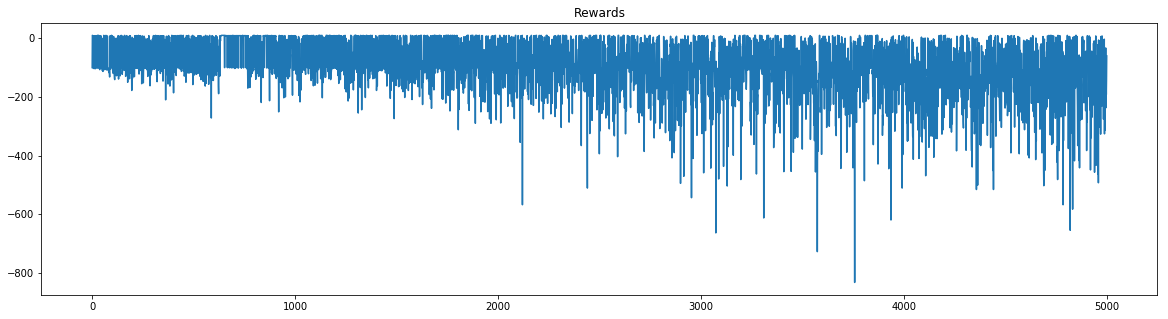

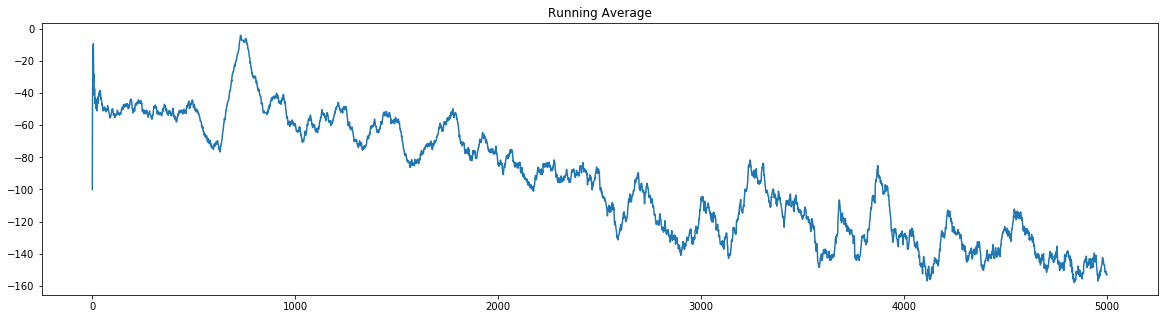

In [9]:
N = 5000
totalrewards = np.empty(N)
for n in range(N):
    eps = 1.0/np.sqrt(n+1)
    totalreward = play_one(env, model, eps)
    totalrewards[n] = totalreward
    if n % (N/5) == 0:
        print_model(model, n=n)

print("avg reward for last 100 episodes:", totalrewards[-100:].mean())
print("total steps:", totalrewards.sum())

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(totalrewards)
ax.set_title("Rewards")

print_model(model, n=n)
plot_running_avg(totalrewards)